In [9]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

In [10]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [11]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [12]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

In [13]:
print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

saint george bm


In [14]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key


In [15]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0d7e0bb4671a7dd4b9bf59bd00ed80ea


In [16]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0d7e0bb4671a7dd4b9bf59bd00ed80ea&q=Boston


In [17]:
# to make the full url for the city requested
url2 = "http://api.openweathermap.org/data/2.5/weather?units=Imperial"
City = "Nashville"
query_URL = url2 + "&APPID=" + weather_api_key + "&q=" + City
query_URL

'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0d7e0bb4671a7dd4b9bf59bd00ed80ea&q=Nashville'

In [18]:
# response/output variable from the JSON get request
# refer to the request library:  https://requests.kennethreitz.org/en/master/
weather_response = requests.get(query_URL)
weather_json = weather_response.json()

In [19]:
# look at the keys in the json file
weather_json.keys()

dict_keys(['coord', 'weather', 'base', 'main', 'visibility', 'wind', 'clouds', 'dt', 'sys', 'timezone', 'id', 'name', 'cod'])

In [20]:
# look deeper into the key. also refer to the API get examples on the openweathermap website
# determine what the data looks like. for example: how the temperature is displayed. Kelvin? 
weather_json.get('main')

{'temp': 62.6,
 'feels_like': 60.67,
 'temp_min': 62.6,
 'temp_max': 62.6,
 'pressure': 1012,
 'humidity': 45}

In [21]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [22]:
# check to see what the status code is     result of 200 is good
city_weather.status_code

200

In [23]:
# Create an endpoint URL for a city.    Result is 404. It failed because Boston is spelled wrong
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
city_weather

<Response [404]>

In [24]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Nashville"
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [25]:
# Get the text of the 'Get' request to see the json code.
city_weather.text

'{"coord":{"lon":-86.7844,"lat":36.1659},"weather":[{"id":804,"main":"Clouds","description":"overcast clouds","icon":"04d"}],"base":"stations","main":{"temp":62.6,"feels_like":60.67,"temp_min":62.6,"temp_max":62.6,"pressure":1012,"humidity":45},"visibility":10000,"wind":{"speed":10.36,"deg":270},"clouds":{"all":90},"dt":1618693968,"sys":{"type":1,"id":4609,"country":"US","sunrise":1618657837,"sunset":1618705331},"timezone":-18000,"id":4644585,"name":"Nashville","cod":200}'

In [26]:
# look at in a more readable json format
city_weather.json()

{'coord': {'lon': -86.7844, 'lat': 36.1659},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 62.6,
  'feels_like': 60.67,
  'temp_min': 62.6,
  'temp_max': 62.6,
  'pressure': 1012,
  'humidity': 45},
 'visibility': 10000,
 'wind': {'speed': 10.36, 'deg': 270},
 'clouds': {'all': 90},
 'dt': 1618693968,
 'sys': {'type': 1,
  'id': 4609,
  'country': 'US',
  'sunrise': 1618657837,
  'sunset': 1618705331},
 'timezone': -18000,
 'id': 4644585,
 'name': 'Nashville',
 'cod': 200}

In [27]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "" # City
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City weather not found.


In [28]:
# Create an endpoint URL for a city.     # this code did NOT work as intended. It should print the else line; but never does.
city_url2 = url + "&q=" + ""
city_weather2 = requests.get(city_url2)
if city_weather2.json():
    print(f"City Weather found.")
    city_weather2.json()
else:
    print(f"City weather not found.")
city_weather2.json()

City Weather found.


{'cod': '400', 'message': 'Nothing to geocode'}

In [29]:
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0d7e0bb4671a7dd4b9bf59bd00ed80ea&q=


In [30]:
# CREATE and DATAFRAME for the json data
# Create an endpoint URL for a city.
city_url = url + "&q=" + City
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -86.7844, 'lat': 36.1659},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 62.6,
  'feels_like': 60.67,
  'temp_min': 62.6,
  'temp_max': 62.6,
  'pressure': 1012,
  'humidity': 45},
 'visibility': 10000,
 'wind': {'speed': 10.36, 'deg': 270},
 'clouds': {'all': 90},
 'dt': 1618693968,
 'sys': {'type': 1,
  'id': 4609,
  'country': 'US',
  'sunrise': 1618657837,
  'sunset': 1618705331},
 'timezone': -18000,
 'id': 4644585,
 'name': 'Nashville',
 'cod': 200}

In [31]:
# Get the City 'sys' data from the json data
city_data = city_weather.json()
city_data['sys']

{'type': 1,
 'id': 4609,
 'country': 'US',
 'sunrise': 1618657837,
 'sunset': 1618705331}

In [32]:
city_data['sys']['country']

'US'

In [33]:
# the date ['dt'] format appears in seconds
# This is called Coordinated Universal Time (UTC) or Greenwich Mean Time (GMT)
city_data['dt']

1618693968

In [34]:
# pull all informaiton from the json data to make the df
lat = city_data["coord"]["lat"]
lng = city_data["coord"]["lon"]
max_temp = city_data["main"]["temp_max"]
humidity = city_data["main"]["humidity"]
clouds = city_data["clouds"]["all"]
wind = city_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

36.1659 -86.7844 62.6 45 90 10.36


In [35]:
# to change date format to ISO yyy-mm-dd-hh-mm-ss we nee dto use th epython datetime module
# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date = city_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date)

datetime.datetime(2021, 4, 17, 21, 12, 48)

In [36]:
# change the output of the time/date to be what you want
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2021-04-17 21:12:48'

In [37]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'04/17/21'

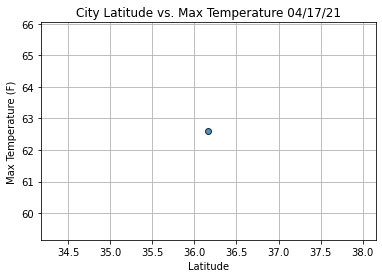

In [40]:
import matplotlib.pyplot as plt

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lat,
            max_temp,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()